In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
import pickle
import json

### 1.Problem Statement

### 2.Data Gathering

In [6]:
df = pd.read_csv("F:\Python\Data_Science_ Projects\Medical_Insurance\static\csv_files\medical_insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3.Data Preprocessing(EDA)

In [10]:
df.gender.value_counts().to_dict()

{'male': 676, 'female': 662}

In [11]:
df.smoker.value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [12]:
df.region.value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

##### Label encoding

In [13]:
df['gender'].replace({'male': 1, 'female': 0}, inplace=True)
gender_data = {'male':1, 'female':0}

In [14]:
df['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)
smoker_data = {'yes':1, 'no':0}

##### one hot encoding

In [15]:
df = pd.get_dummies(df, columns=['region'], dtype=int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   gender            1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int32  
 7   region_northwest  1338 non-null   int32  
 8   region_southeast  1338 non-null   int32  
 9   region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.8 KB


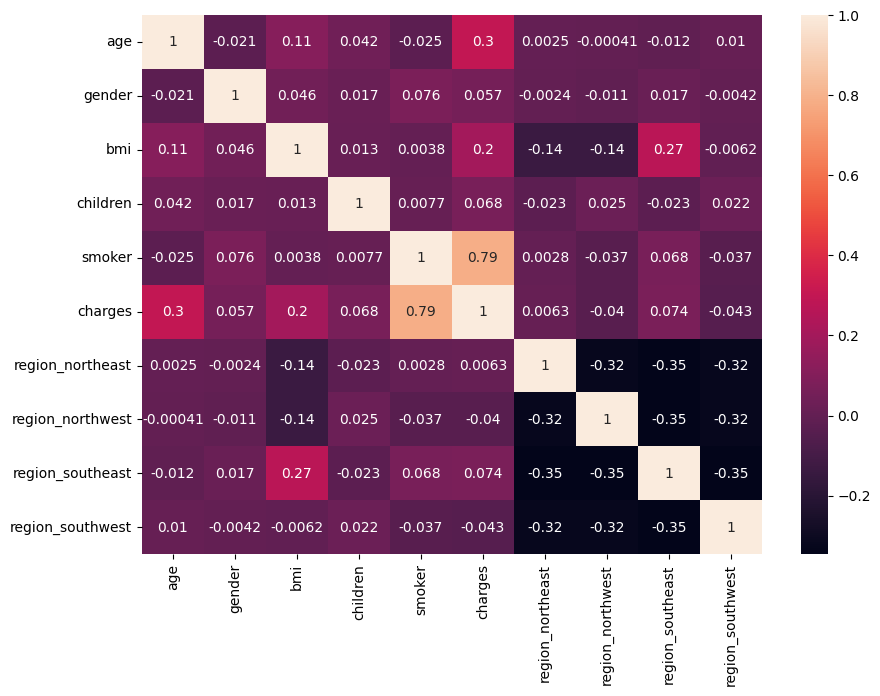

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

### 4.Feature Selection / Extraction

In [25]:
x = df.drop('charges', axis=1)
y = df['charges']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [27]:
# Use SelectKBest to select top k features based on f_regression
# selector = SelectKBest(score_func=f_regression, k=5)
# x_new = selector.fit_transform(x, y)

# Get the selected feature names
# selected_features = x.columns[selector.get_support(indices=True)].tolist()

# Update x with the selected features
# x = pd.DataFrame(x_new, columns=selected_features)

### 5.Model Training 

In [33]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred_train = linear_reg.predict(x_train)
y_pred_test = linear_reg.predict(x_test)

### 6.Model Evaluation

In [126]:
y_pred_train = linear_reg.predict(x_train)

In [31]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

train_mae = mean_absolute_error(y_train, y_pred_train)

train_r2 = r2_score(y_train, y_pred_train)
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Training R-Squared:", train_r2)

R2 score:  0.7990637930035749


In [32]:
y_pred_test = linear_reg.predict(x_test)

In [129]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

test_mae = mean_absolute_error(y_test, y_pred_test)

test_r2 = r2_score(y_test, y_pred_test)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R-Squared:", test_r2)

Test RMSE: 5344.218063789126
Test MAE: 3820.7706849786423
Test R-Squared: 0.7990637930035749


### 7.Single row Testing

In [137]:
column_names = x.columns.tolist()
column_names

['age',
 'gender',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [138]:
age = 30
gender = 'male'
bmi = 28.265
children = 2
smoker = 'yes'
region = 'northwest'

gender = gender_data[gender]
smoker = smoker_data[smoker]
region = 'region_'+region

region_index = column_names.index(region)
region_index

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = age
test_array[0,1] = gender
test_array[0,2] = bmi
test_array[0,3] = children
test_array[0,4] = smoker
test_array[0,region_index] = 1

In [139]:
predicted_charges = np.around(linear_reg.predict(test_array)[0],3)
print(predicted_charges)

29988.467


### 9.pkl file and json file 

In [140]:
with open('linear_regression.pkl','wb') as f: 
    pickle.dump(linear_reg, f)

In [141]:
project_data = {"Gender": gender_data,
               "Smoker":smoker_data,
               "Column Names" : column_names}

In [142]:
with open('proj_data.json','w') as f:
    json.dump(project_data, f)